# Predicting Sentiment of Movie Reviews

## Setting up everything

1. Setup environment, install pandas

In [12]:
pip install pandas numpy scikit-learn nltk

2. Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

3. Load the dataset (we are uysing IMDB, upload it to the folder "content")

In [14]:
# Load data
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


4. Preprocess the text.
We'll clean the reviews by removing HTML tags, punctuation, stopwords, etc.

In [11]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


## Vectorization, model training, and prediction

5. Convert text to vectors ( we will use TfidVectorizer)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus).toarray()
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

6. Split the data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Train a Machine Learning Model with logistic regression

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

8. Evaluate the model

In [18]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8863121185701831

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      2900
           1       0.87      0.90      0.89      2835

    accuracy                           0.89      5735
   macro avg       0.89      0.89      0.89      5735
weighted avg       0.89      0.89      0.89      5735



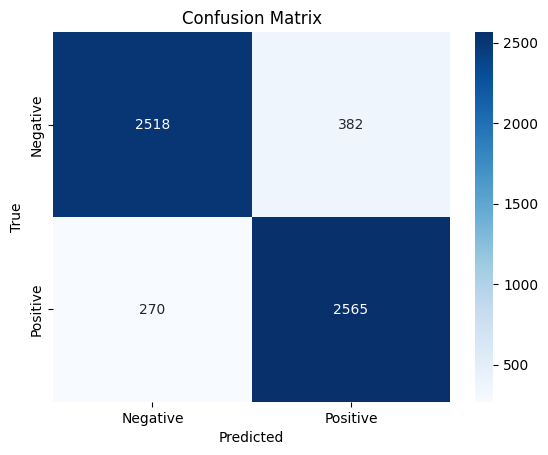

In [19]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

9. Predict my own reviews

In [24]:
def predict_sentiment(text):
    # Clean and preprocess
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)

    # Vectorize
    vectorized = vectorizer.transform([review]).toarray()

    # Predict
    prediction = model.predict(vectorized)
    return "Positive 😊" if prediction[0] == 1 else "Negative 😞"

Example:

In [26]:
print(predict_sentiment("It was so boring I almost fell asleep."))
print(predict_sentiment("Best movie I've seen this year!"))
print(predict_sentiment("Just a terrible script and awful acting."))

Negative 😞
Positive 😊
Negative 😞


Save Your Model and Vectorizer

In [27]:
import joblib

joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']